# Sklearn

## Bike Sharing Demand
Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В исходной постановке задачи доступно 11 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

Для демонстрации используется обучающая выборка из исходных данных train.csv.

### Библиотеки

In [1]:
from sklearn import cross_validation, grid_search, linear_model, metrics

import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/emily/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Загрузка данных

In [8]:
data = pd.ExcelFile('excell_file.xlsx')
data.parse(0, index_col=None, na_values='NA')

,date,test_smape1,test_smape2
0,20160806,0.322690,0.645380
1,20160807,0.304917,0.609834
2,20160813,0.308416,0.616833
3,20160814,0.294624,0.589248
4,20160820,0.299598,0.599196
5,20160821,0.378299,0.756598
6,20160827,0.326613,0.653226
7,20160828,0.328751,0.657502


In [9]:
raw_data = pd.read_csv('bike_sharing_demand.csv', header = 0, sep = ',')

In [10]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals

In [11]:
print raw_data.shape

(10886, 12)


In [18]:
raw_data.isnull().values.any()

### Предобработка данных

#### Типы признаков

In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.1 MB


In [20]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

In [22]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [23]:
from datetime import datetime

In [24]:
a = datetime(2016, 11, 17)

In [29]:
a.weekday()

3

In [30]:
raw_data['month'] = raw_data.datetime.apply(lambda x : x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x : x.hour)
raw_data['week_day'] = raw_data.datetime.apply(lambda x : x.weekday() + 1)

In [35]:
raw_data['year'] = raw_data.datetime.apply(lambda x : x.year)

In [31]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,week_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,1,0,6
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,1,1,6
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,1,2,6
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,1,3,6
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,1,4,6


In [33]:
print raw_data.datetime.min()
print raw_data.datetime.max()

2011-01-01 00:00:00
2012-12-19 23:00:00


In [49]:
grouped = raw_data.groupby(by = ['year', 'month']).aggregate(np.sum)[['count']].reset_index()

In [54]:
grouped2 = raw_data[['year', 'month', 'count']].groupby(by = ['year', 'month']).aggregate(np.sum).reset_index()

In [62]:
grouped2['date'] = grouped2.apply(lambda raw : str(raw['year']) + '_' + str(raw['month']), axis = 1)
grouped2.head()

,year,month,count,date
0,2011,1,23552,2011_1
1,2011,2,32844,2011_2
2,2011,3,38735,2011_3
3,2011,4,50517,2011_4
4,2011,5,79713,2011_5


In [66]:
grouped2.dtypes

year      int64
month     int64
count     int64
date     object
dtype: object

In [91]:
tmp = grouped2[grouped2.year == 2012][['month', 'count']]

In [94]:
frame = pd.DataFrame()
frame['month'] = grouped2[grouped2.year == 2011][['month']]
frame['count_2011'] = grouped2[grouped2.year == 2011][['count']]
frame

,month,count_2011
0,1,23552
1,2,32844
2,3,38735
3,4,50517
4,5,79713
5,6,89776
6,7,92848
7,8,83296
8,9,79104
9,10,79522


In [100]:
frame = frame.merge(tmp, on = 'month')

In [102]:
frame

,month,count_2011,count_2012
0,1,23552,56332
1,2,32844,66269
2,3,38735,94766
3,4,50517,116885
4,5,79713,120434
5,6,89776,130957
6,7,92848,121769
7,8,83296,130220
8,9,79104,133425
9,10,79522,127912


In [101]:
frame.columns = ['month', 'count_2011', 'count_2012']

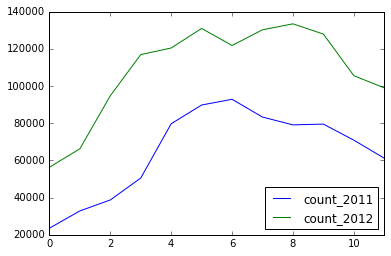

In [104]:
frame[['count_2011', 'count_2012']].plot()

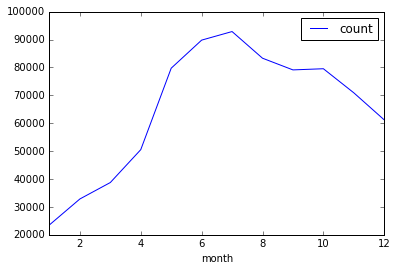

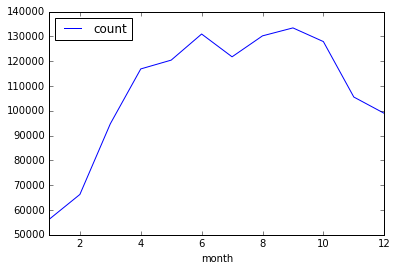

In [71]:
grouped2[grouped2.year == 2011].plot(x = 'month', y = 'count')
grouped2[grouped2.year == 2012].plot(x = 'month', y = 'count')

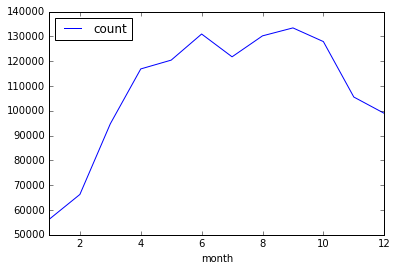

#### Обучение и отложенный тест

In [105]:
train_data = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [ ]:
print raw_data.shape, train_data.shape, hold_out_test_data.shape

In [106]:
print 'train period from {} to {}'.format(train_data.datetime.min(), train_data.datetime.max())
print 'evaluation period from {} to {}'.format(hold_out_test_data.datetime.min(), hold_out_test_data.datetime.max())

train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00
evaluation period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


#### Данные и целевая функция

In [107]:
#обучение
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count'], axis = 1)

In [108]:
#тест
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop(['datetime', 'count'], axis = 1)

#### Целевая функция на обучающей выборке и на отложенном тесте

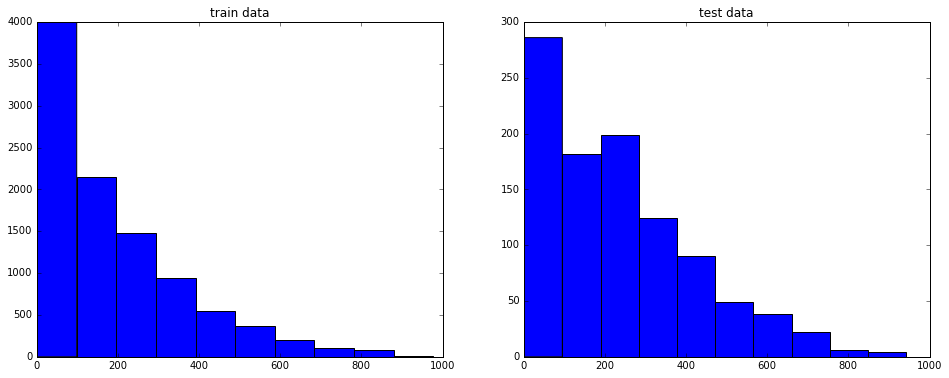

In [109]:
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('test data')

#### Числовые признаки

In [111]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour', 'year']

In [112]:
train_data = train_data[numeric_columns]
test_data = test_data[numeric_columns]

In [113]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
0,9.84,14.395,81,0,3,13,1,0,2011
1,9.02,13.635,80,0,8,32,1,1,2011
2,9.02,13.635,80,0,5,27,1,2,2011
3,9.84,14.395,75,0,3,10,1,3,2011
4,9.84,14.395,75,0,0,1,1,4,2011


In [114]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
9886,17.22,21.210,67,6.0032,20,505,10,7,2012
9887,18.04,21.970,62,0.0000,35,800,10,8,2012
9888,19.68,23.485,55,16.9979,32,323,10,9,2012
9889,20.50,24.240,48,19.0012,65,157,10,10,2012
9890,20.50,24.240,45,27.9993,56,172,10,11,2012


In [115]:
train_data.describe()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
count,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000,9886.000000
mean,20.749003,24.193210,61.580012,12.858876,36.786567,150.682278,6.031357,11.538944,2011.451548
std,7.914962,8.612127,19.400891,8.243959,50.861132,148.035930,3.225974,6.916852,0.497672
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2011.000000
25%,13.940000,16.665000,46.000000,7.001500,4.000000,34.000000,3.000000,6.000000,2011.000000
50%,21.320000,25.000000,62.000000,12.998000,17.000000,113.000000,6.000000,12.000000,2011.000000
75%,27.060000,31.060000,77.000000,16.997900,50.000000,216.000000,9.000000,18.000000,2012.000000
max,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,12.000000,23.000000,2012.000000


In [116]:
test_data.describe()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,15.108500,18.335175,64.9160,12.211366,28.463000,203.696000,11.367000,11.568000,2012
std,3.560087,4.176557,17.3501,7.310975,39.205302,170.786169,0.640876,6.909205,0
min,6.560000,9.090000,16.0000,0.000000,0.000000,1.000000,10.000000,0.000000,2012
25%,12.300000,15.150000,52.0000,7.001500,5.000000,64.000000,11.000000,6.000000,2012
50%,14.760000,17.425000,63.0000,11.001400,16.000000,178.000000,11.000000,12.000000,2012
75%,17.220000,21.210000,81.0000,16.997900,34.000000,302.000000,12.000000,18.000000,2012
max,27.060000,31.060000,100.0000,43.000600,304.000000,839.000000,12.000000,23.000000,2012


### Модель

In [117]:
regressor = linear_model.SGDRegressor(random_state = 0)

In [118]:
regressor.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

281908708562256.56

In [119]:
print test_labels[:10]

[525 835 355 222 228 325 328 308 346 446]


In [120]:
print regressor.predict(test_data)[:10]

[ -5.04311877e+14  -7.24125558e+14  -3.38901800e+14  -2.40144889e+14
  -2.09430445e+14  -2.97545815e+14  -3.06732288e+14  -2.94558572e+14
  -3.05473409e+14  -3.76658903e+14]


In [121]:
regressor.coef_

array([ -1.02967083e+12,  -1.24526954e+12,  -2.70504794e+12,
         2.54162739e+12,  -1.09288312e+12,  -6.77823485e+11,
        -1.97997457e+10,   6.08865995e+10,   3.46629829e+10])

In [122]:
test_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
9886,17.22,21.210,67,6.0032,20,505,10,7,2012
9887,18.04,21.970,62,0.0000,35,800,10,8,2012
9888,19.68,23.485,55,16.9979,32,323,10,9,2012
9889,20.50,24.240,48,19.0012,65,157,10,10,2012
9890,20.50,24.240,45,27.9993,56,172,10,11,2012


### Scaling

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
#создаем scaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [127]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

0.11065315210996257

In [128]:
print test_labels[:10]

[525 835 355 222 228 325 328 308 346 446]


In [129]:
print regressor.predict(scaled_test_data)[:10]

[ 524.83698603  834.84175856  354.86396113  221.89530717  227.84744926
  324.88597616  327.90091315  307.93455794  345.9037671   445.90398138]


### Подозрительно хорошо?

In [130]:
print regressor.coef_

[  1.29448025e+00  -1.29043936e+00   1.31933375e-02  -4.05940107e-02
   5.08590616e+01   1.48007111e+02  -9.50811646e-03   5.13469808e-03
  -3.11281720e-03]


In [131]:
print map(lambda x : round(x, 2), regressor.coef_)

[1.29, -1.29, 0.01, -0.04, 50.86, 148.01, -0.01, 0.01, -0.0]


In [132]:
train_data.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour,year
0,9.84,14.395,81,0,3,13,1,0,2011
1,9.02,13.635,80,0,8,32,1,1,2011
2,9.02,13.635,80,0,5,27,1,2,2011
3,9.84,14.395,75,0,3,10,1,3,2011
4,9.84,14.395,75,0,0,1,1,4,2011


In [ ]:
train_labels[:10]

In [133]:
np.all(train_data.registered + train_data.casual == train_labels)

True

In [134]:
train_data.drop(['casual', 'registered'], axis = 1, inplace = True)
test_data.drop(['casual', 'registered'], axis = 1, inplace = True)

In [135]:
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [136]:
regressor.fit(scaled_train_data, train_labels)
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

126.21502118610957

In [141]:
from sklearn.metrics import r2_score

In [142]:
r2_score(test_labels, regressor.predict(scaled_test_data))

0.25807067738793033

In [137]:
print map(lambda x : round(x, 2), regressor.coef_)

[21.95, 29.22, -39.65, 7.39, 24.92, 51.96, 41.64]


In [138]:
train_data.head()

,temp,atemp,humidity,windspeed,month,hour,year
0,9.84,14.395,81,0,1,0,2011
1,9.02,13.635,80,0,1,1,2011
2,9.02,13.635,80,0,1,2,2011
3,9.84,14.395,75,0,1,3,2011
4,9.84,14.395,75,0,1,4,2011


In [139]:
print train_data.windspeed.min()
print train_data.windspeed.max()

0.0
56.9969


In [143]:
?regressor

### Pipeline

In [145]:
from sklearn.pipeline import Pipeline

In [146]:
#создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])

In [147]:
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

126.21502118610957

### Подбор параметров

In [150]:
regressor.get_params().keys()

['warm_start',
 'loss',
 'eta0',
 'verbose',
 'shuffle',
 'fit_intercept',
 'l1_ratio',
 'average',
 'n_iter',
 'penalty',
 'power_t',
 'random_state',
 'epsilon',
 'alpha',
 'learning_rate']

In [151]:
pipeline.get_params().keys()

['regression__random_state',
 'regression__n_iter',
 'regression__epsilon',
 'regression__power_t',
 'regression__alpha',
 'regression__eta0',
 'regression__loss',
 'scaling',
 'steps',
 'scaling__copy',
 'regression__fit_intercept',
 'regression__warm_start',
 'regression__penalty',
 'regression__learning_rate',
 'regression__average',
 'regression__verbose',
 'regression__shuffle',
 'regression__l1_ratio',
 'regression',
 'scaling__with_std',
 'scaling__with_mean']

In [152]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__n_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0, 1],
}

In [153]:
grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring = 'mean_absolute_error', cv = 4)

In [154]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 31.1 s, sys: 419 ms, total: 31.5 s
Wall time: 16.7 s


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'regression__n_iter': [3, 5, 10, 50], 'regression__loss': ['huber', 'epsilon_insensitive', 'squared_loss'], 'scaling__with_mean': [0, 1], 'regression__alpha': [0.0001, 0.01], 'regression__penalty': ['l1', 'l2', 'none']},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=0)

In [155]:
print grid_cv.best_score_
print grid_cv.best_params_

-108.393209497
{'regression__n_iter': 3, 'regression__loss': 'squared_loss', 'scaling__with_mean': 1, 'regression__alpha': 0.01, 'regression__penalty': 'l2'}


### Оценка по отложенному тесту

In [156]:
metrics.mean_absolute_error(test_labels, grid_cv.best_estimator_.predict(test_data))

127.0944947298287

In [157]:
np.mean(test_labels)

232.15899999999999

In [126]:
scaled_test_data[:2]

array([[-0.44588732, -0.34641391,  0.27938212, -0.83164209, -0.33006375,
         2.39357866,  1.23027756, -0.65624846,  1.10209153],
       [-0.34228082, -0.25816179,  0.02164896, -1.55987276, -0.03512814,
         4.38643891,  1.23027756, -0.51166671,  1.10209153]])

In [159]:
zip(test_labels, grid_cv.best_estimator_.predict(test_data))

[(525, 199.66088809956213),
 (835, 218.86729741125811),
 (355, 263.5221598375972),
 (222, 292.49984066506136),
 (228, 312.31750998614001),
 (325, 320.79172292662093),
 (328, 325.93313272975058),
 (308, 350.03162854742959),
 (346, 356.37237377232867),
 (446, 365.80850113749534),
 (943, 363.50231498276571),
 (838, 357.50337774382263),
 (531, 338.90077766032113),
 (432, 325.68247039284728),
 (195, 315.70470512502129),
 (181, 293.71762592973255),
 (199, 296.7993405556694),
 (49, 115.04923132249577),
 (17, 122.25033630281814),
 (16, 129.4514412831405),
 (7, 107.66119792166801),
 (4, 129.20599337100887),
 (41, 134.94756056842397),
 (178, 145.37170851831874),
 (464, 151.49434085974769),
 (817, 178.04597194574114),
 (382, 188.47011989563592),
 (228, 227.90311521740108),
 (234, 284.33965357966304),
 (332, 306.80049595644363),
 (310, 315.86748030699283),
 (270, 342.69780235343842),
 (301, 358.03153583939172),
 (466, 339.1438483804597),
 (888, 328.27032366560911),
 (884, 326.38617924717391),
 (51

In [164]:
def mean_percentage_error(test_labels, test_predictions):
    pairs = zip(test_labels, test_predictions)
    error = []
    for i in pairs:
        error.append(100 * abs(i[0] - i[1])/i[0])
    return error

In [165]:
errors = mean_percentage_error(test_labels, grid_cv.best_estimator_.predict(test_data))

(array([ 939.,   46.,    8.,    2.,    3.,    0.,    0.,    1.,    0.,    1.]),
 array([  9.01926898e-03,   1.84133401e+03,   3.68265899e+03,
          5.52398398e+03,   7.36530897e+03,   9.20663396e+03,
          1.10479589e+04,   1.28892839e+04,   1.47306089e+04,
          1.65719339e+04,   1.84132589e+04]),
 <a list of 10 Patch objects>)

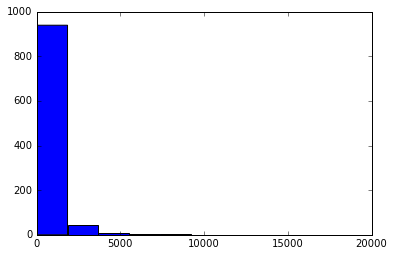

In [167]:
pylab.hist(errors)

In [168]:
test_predictions = grid_cv.best_estimator_.predict(test_data)

In [169]:
print test_labels[:10]

[525 835 355 222 228 325 328 308 346 446]


In [170]:
print test_predictions[:10]

[ 199.6608881   218.86729741  263.52215984  292.49984067  312.31750999
  320.79172293  325.93313273  350.03162855  356.37237377  365.80850114]


(-100, 1100)

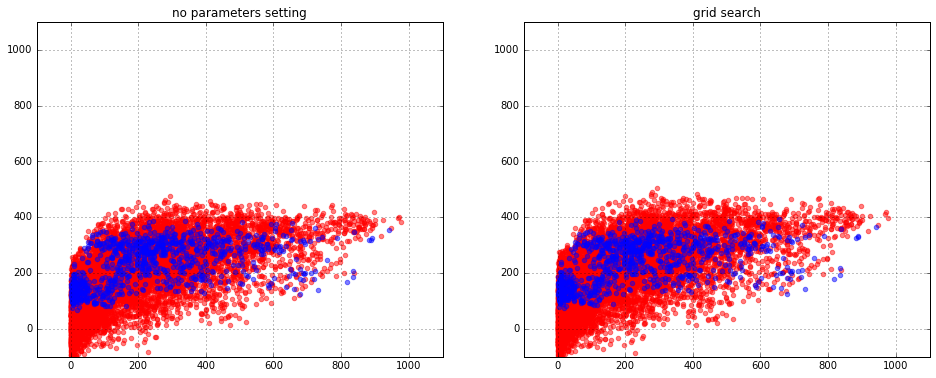

In [171]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(train_labels, pipeline.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, pipeline.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('no parameters setting')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('grid search')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)